In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from tqdm import tqdm
from sklearn.tree import export_text, export_graphviz
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, plot_confusion_matrix

[nltk_data] Downloading package stopwords to /Users/tarun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def clean(data):
    review = re.sub('[^a-zA-Z]', ' ', data)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    return review

In [7]:
master_data = pd.read_csv('dataset/master996.csv')
dataset = []
for i, r in tqdm(master_data.iterrows()):
    name = r['Book_Name']
    author = r['Author_Name']
    book_id = r['book_id']
    genre = r['guten_genre']
    with open('dataset/books/{}-content.html'.format(book_id.split('.epub')[0]), 'r') as file:
        soup = BeautifulSoup(str(file.readlines()))
        book_text = clean(soup.get_text())
    row = [name, author, book_text, genre]
    dataset.append(row)

df = pd.DataFrame(dataset, columns=['name', 'author', 'text', 'genre'])
df.to_csv('dataset.csv', index=False)

In [8]:
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, 2].astype('U').values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X_tf = tf.fit_transform(X).toarray()

(996,)
False


In [10]:
from sklearn.model_selection import train_test_split
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y, test_size = 0.30, random_state = 0, stratify=y)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7850185241489589
0.7208286984346454
0.802675585284281


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7850185241489589
0.7208286984346454
0.802675585284281


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8113866552811975
0.7995969470885859
0.842809364548495


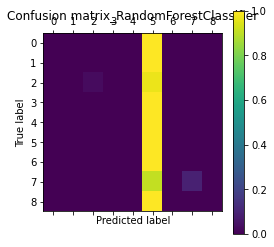

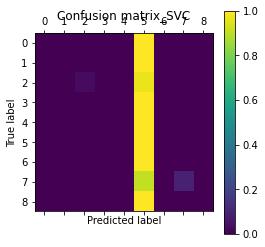

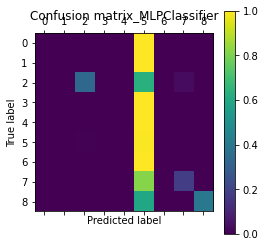

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifiers = [RandomForestClassifier(n_estimators=100), SVC(), MLPClassifier()]
for classifier in classifiers:
    classifier.fit(X_train_tf, y_train_tf)
    y_pred = classifier.predict(X_test_tf)
    cm = confusion_matrix(y_test_tf, y_pred, labels=['Allegories', 'Christmas Stories', 'Detective and Mystery',
       'Ghost and Horror', 'Humorous and Wit and Satire', 'Literary',
       'Love and Romance', 'Sea and Adventure', 'Western Stories'])
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     print(cm)
    print(precision_score(y_test_tf, y_pred, average='weighted'))
    print(f1_score(y_test_tf, y_pred, average='weighted'))
    print(recall_score(y_test_tf, y_pred, average='weighted'))
    
    plt.matshow(cm)
    plt.title('Confusion matrix_{}'.format(str(classifier).split('(')[0]))
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('{}_BoW.png'.format(str(classifier).split('(')[0]), bbox_inches='tight',dpi=199)

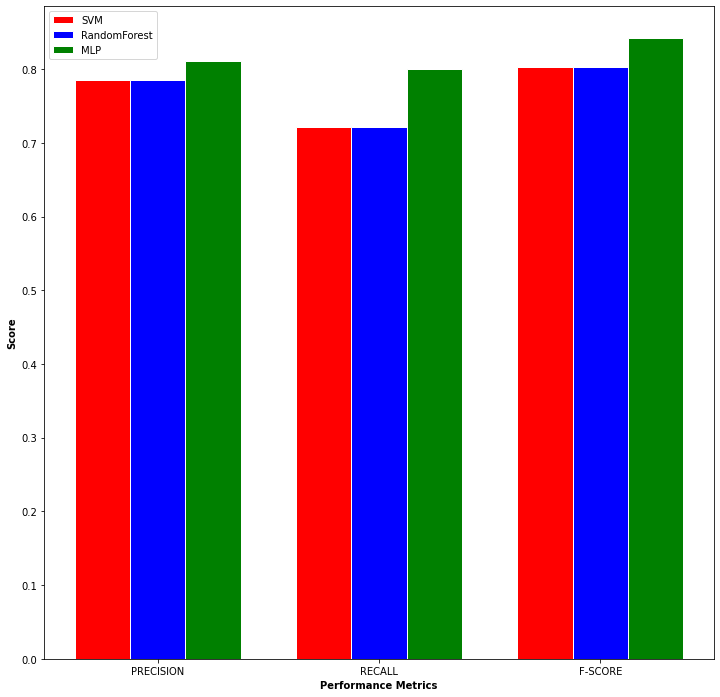

In [13]:
# set width of bar
barWidth = 0.25
 
# set height of bar
RandomForest = [0.7850185241489589, 0.7208286984346454, 0.802675585284281]
SVM = [0.7850185241489589, 0.7208286984346454, 0.802675585284281]
MLP = [0.8113866552811975, 0.7995969470885859, 0.842809364548495]
# BoW = d['BoW']
 
# Set position of bar on X axis
r1 = np.arange(len(SVM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
 
# Make the plot
f, (ax1) = plt.subplots(1, 1, figsize=(12, 12))
plt.bar(r1, SVM, color='red', width=barWidth, edgecolor='white', label='SVM')
plt.bar(r2, RandomForest, color='blue', width=barWidth, edgecolor='white', label='RandomForest')
plt.bar(r3, MLP, color='green', width=barWidth, edgecolor='white', label='MLP')
# plt.bar(r4, BoW, color='cyan', width=barWidth, edgecolor='white', label='BoW')
 
# Add xticks on the middle of the group bars
plt.xlabel('Performance Metrics', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(SVM))], ['PRECISION','RECALL','F-SCORE'])
 
# Create legend & Show graphic
plt.legend()
plt.savefig('Features_Comparison_BoW.png', bbox_inches='tight',dpi=199)